In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


# PHASE 1

#### TASK 1.1 Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [29]:
# URLs for the datasets
train_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
test_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

# Load data into DataFrames
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

print("Training data loaded successfully.")
print("Testing data loaded successfully.")

Training data loaded successfully.
Testing data loaded successfully.


In [30]:
# Display the first 5 rows of the training data
print("--- First 5 Rows of Training Data ---")
print(train_df.head())

--- First 5 Rows of Training Data ---
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Ru

In [31]:
# Check data types and non-null counts
print("\n--- Data Types and Non-Null Counts (Training Data) ---")
train_df.info()


--- Data Types and Non-Null Counts (Training Data) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
# Get specific counts of missing values
print("\n--- Missing Value Counts (Training Data) ---")
print(train_df.isnull().sum())

# Check for duplicates
print(f"\n--- Duplicate Rows (Training Data) ---")
print(f"Number of duplicate rows: {train_df.duplicated().sum()}")


--- Missing Value Counts (Training Data) ---
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

--- Duplicate Rows (Training Data) ---
Number of duplicate rows: 0


#### Inspection Analysis & Next Steps

From fresh inspection , I have confirmed the following issues:

    Missing Values: There is missing data in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.

Inconsistencies: The Dependents column has an object (text) data type, likely due to values like '3+', which needs to be converted to a number.

Duplicates: There are 0 duplicate rows.

#### TASK 1.3. Clean the dataset by handling missing values, correcting data types, and addressing outliers.
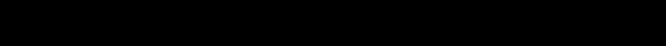

In [33]:
print("--- Starting Data Cleaning (Task 1.3) ---")

# 1. Handle Categorical Missing Values (using mode)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    mode_val = train_df[col].mode()[0]
    train_df.fillna({col: mode_val}, inplace=True)
    test_df.fillna({col: mode_val}, inplace=True)
    # train_df[col].fillna(mode_val, inplace=True)
    # test_df[col].fillna(mode_val, inplace=True)
print(f"Filled missing values for: {categorical_cols}")

# 2. Handle Numerical Missing Values
# Use median for LoanAmount (skewed data)
loan_amount_median = train_df['LoanAmount'].median()
train_df.fillna({'LoanAmount': loan_amount_median}, inplace=True)
test_df.fillna({'LoanAmount': loan_amount_median}, inplace=True)
# train_df['LoanAmount'].fillna(loan_amount_median, inplace=True)
# test_df['LoanAmount'].fillna(loan_amount_median, inplace=True)
print(f"Filled 'LoanAmount' with median: {loan_amount_median}")

# Use mode for Loan_Amount_Term (discrete values)
loan_term_mode = train_df['Loan_Amount_Term'].mode()[0]
train_df.fillna({'Loan_Amount_Term': loan_term_mode}, inplace=True)
test_df.fillna({'Loan_Amount_Term': loan_term_mode}, inplace=True)
# train_df['Loan_Amount_Term'].fillna(loan_term_mode, inplace=True)
# test_df['Loan_Amount_Term'].fillna(loan_term_mode, inplace=True)
print(f"Filled 'Loan_Amount_Term' with mode: {loan_term_mode}")

# 3. Correct Data Types / Inconsistencies
# Fix 'Dependents' column (replace '3+' with '3' and convert to numeric)
train_df['Dependents'] = train_df['Dependents'].replace('3+', '3')
test_df['Dependents'] = test_df['Dependents'].replace('3+', '3')
train_df['Dependents'] = pd.to_numeric(train_df['Dependents'])
test_df['Dependents'] = pd.to_numeric(test_df['Dependents'])
print("Cleaned and converted 'Dependents' column to numeric.")

# 4. Final Verification
print("\n--- Verification: Missing Values After Cleaning (Training) ---")
print(train_df.isnull().sum())

print("\n--- Verification: Missing Values After Cleaning (Testing) ---")
print(test_df.isnull().sum())

--- Starting Data Cleaning (Task 1.3) ---
Filled missing values for: ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
Filled 'LoanAmount' with median: 128.0
Filled 'Loan_Amount_Term' with mode: 360.0
Cleaned and converted 'Dependents' column to numeric.

--- Verification: Missing Values After Cleaning (Training) ---
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

--- Verification: Missing Values After Cleaning (Testing) ---
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: in

# PHASE 2

#### TASK 2.1: Conduct descriptive statistics to summarize key characteristics of the data

In [34]:
print("---Performing Descriptive Statistics of the Train Data---")
print(train_df.describe())

---Performing Descriptive Statistics of the Train Data---
       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     0.744300      5403.459283        1621.245798  145.752443   
std      1.009623      6109.041673        2926.248369   84.107233   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.250000   
50%      0.000000      3812.500000        1188.500000  128.000000   
75%      1.000000      5795.000000        2297.250000  164.750000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        614.000000      614.000000  
mean         342.410423        0.855049  
std           64.428629        0.352339  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000   

#### Key Insights:

Income: ApplicantIncome has a large standard deviation (6109) and a big difference between the 75th percentile (5795) and the max (81000). This indicates the data is highly skewed and has significant outliers. The same applies to CoapplicantIncome.

Loan Amount: LoanAmount also appears skewed, with a median of 128 and a max of 700.

Credit History: About 85.5% of applicants have a good credit history (1.0). This will likely be a very strong predictor.

In [37]:
# Analyze the target variable 'Loan_Status'
print("\n--- Target Variable Distribution (Loan_Status) ---")
print(train_df['Loan_Status'].value_counts())
print("\n--- Target Variable Proportions (Loan_Status) ---")
print(train_df['Loan_Status'].value_counts(normalize=True))


--- Target Variable Distribution (Loan_Status) ---
Loan_Status
Y    422
N    192
Name: count, dtype: int64

--- Target Variable Proportions (Loan_Status) ---
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


#### Insight:
The dataset is imbalanced. About 69% of the loans in the training set were approved ('Y'), and 31% were rejected ('N'). This is important to remember for modeling later.

#### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.
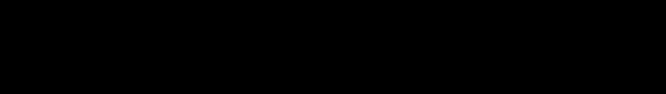

---Visual Distributions of Numerical Features---


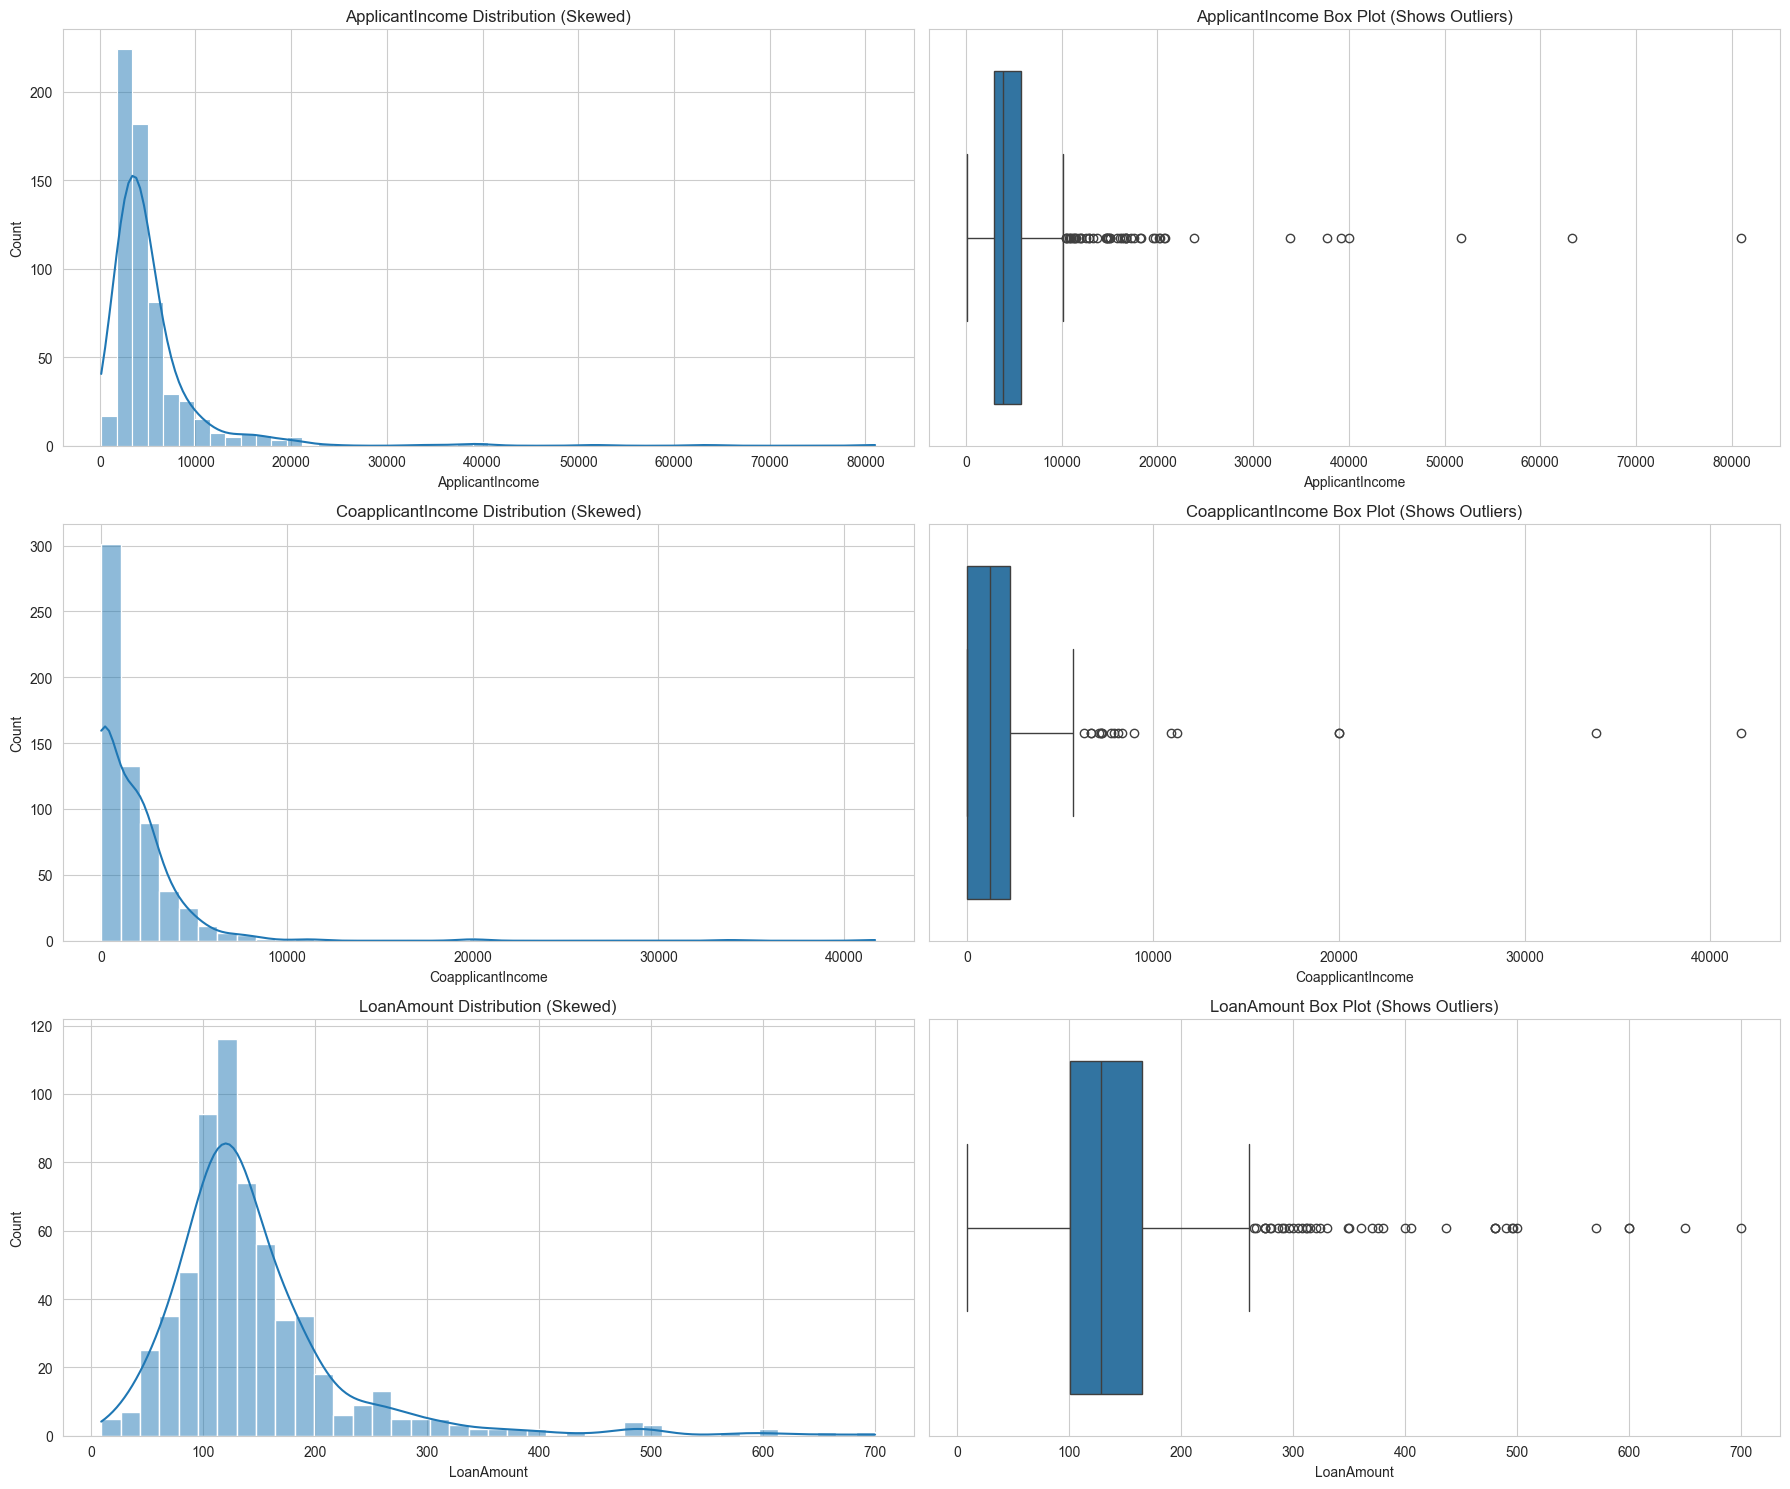

In [39]:
print("---Visual Distributions of Numerical Features---")
# Set up a figure for 3x2 plots (Hist and Box for each)
plt.figure(figsize=(18, 15))

# Plot 1: ApplicantIncome Histogram
plt.subplot(3, 2, 1)
sns.histplot(train_df['ApplicantIncome'], kde=True, bins=50)
plt.title('ApplicantIncome Distribution (Skewed)')

# Plot 2: ApplicantIncome Box Plot
plt.subplot(3, 2, 2)
sns.boxplot(x=train_df['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot (Shows Outliers)')

# Plot 3: CoapplicantIncome Histogram
plt.subplot(3, 2, 3)
sns.histplot(train_df['CoapplicantIncome'], kde=True, bins=40)
plt.title('CoapplicantIncome Distribution (Skewed)')

# Plot 4: CoapplicantIncome Box Plot
plt.subplot(3, 2, 4)
sns.boxplot(x=train_df['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot (Shows Outliers)')

# Plot 5: LoanAmount Histogram
plt.subplot(3, 2, 5)
sns.histplot(train_df['LoanAmount'], kde=True, bins=40)
plt.title('LoanAmount Distribution (Skewed)')

# Plot 6: LoanAmount Box Plot
plt.subplot(3, 2, 6)
sns.boxplot(x=train_df['LoanAmount'])
plt.title('LoanAmount Box Plot (Shows Outliers)')

plt.tight_layout()
plt.show()

#### Insights (Task 2.5):

    The visualizations confirm our findings from describe(). All three features are heavily right-skewed and have significant outliers.

    CoapplicantIncome is interesting: a large number of applicants have 0 co-applicant income, creating a large spike at 0.

    This skewness suggests that for modeling, we might need to apply a log transformation to these features to normalize their distributions.

#### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.
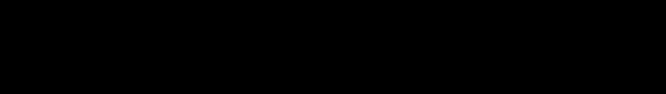

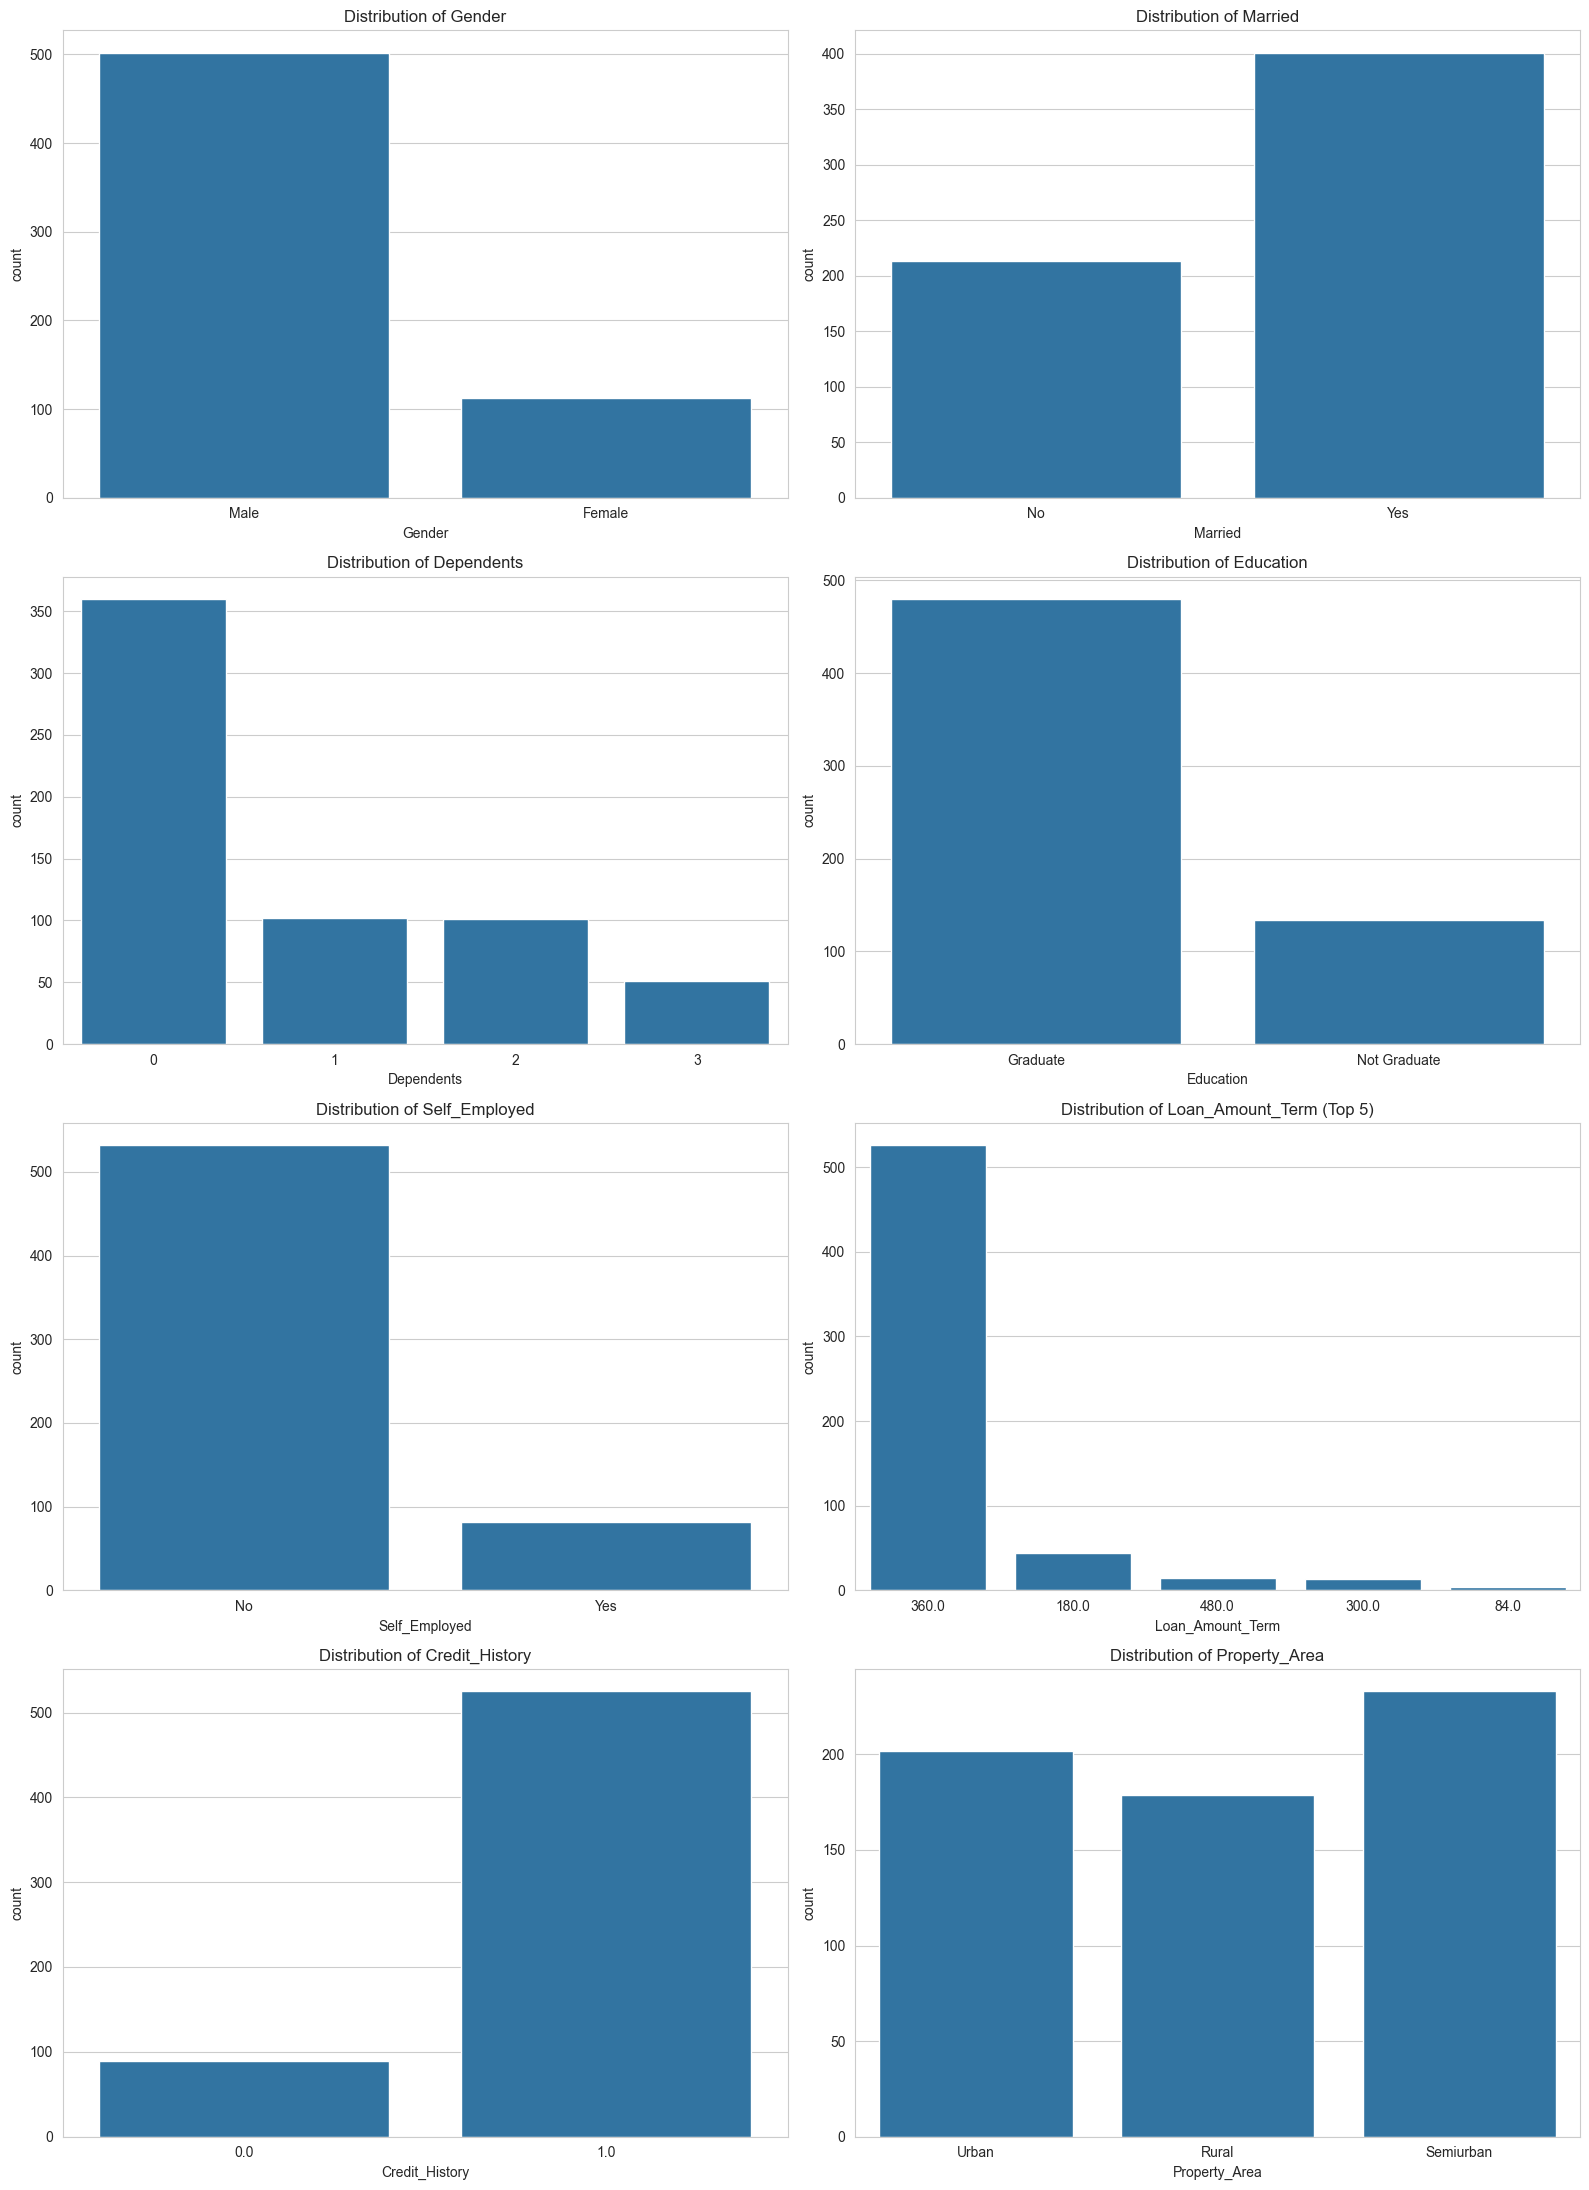

In [40]:
# Define all categorical and discrete features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Set up the plot grid (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(16, 22))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop and plot
for i, col in enumerate(categorical_features):
    # Special handling for Loan_Amount_Term due to many unique values
    if col == 'Loan_Amount_Term':
        # Show only the top 5 most common terms
        sns.countplot(x=col, data=train_df, ax=axes[i], order=train_df[col].value_counts().index[:5])
        axes[i].set_title(f'Distribution of {col} (Top 5)')
    else:
        sns.countplot(x=col, data=train_df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights (Task 2.5):

    Gender: About 80% of applicants are Male.

    Married: About 65% of applicants are Married.

    Dependents: The vast majority of applicants have 0 dependents.

    Education: Most applicants are Graduates (approx. 78%).

    Self_Employed: Very few applicants are self-employed (approx. 14%).

    Loan_Amount_Term: The 360-month (30-year) term is overwhelmingly the most common.

    Credit_History: The vast majority have a good credit history (1.0).

    Property_Area: Semiurban is the most common, followed by Urban and Rural.

#### Task 2.4 Examine relationships between features and the target variable

### Categorical Features vs. Loan_Status

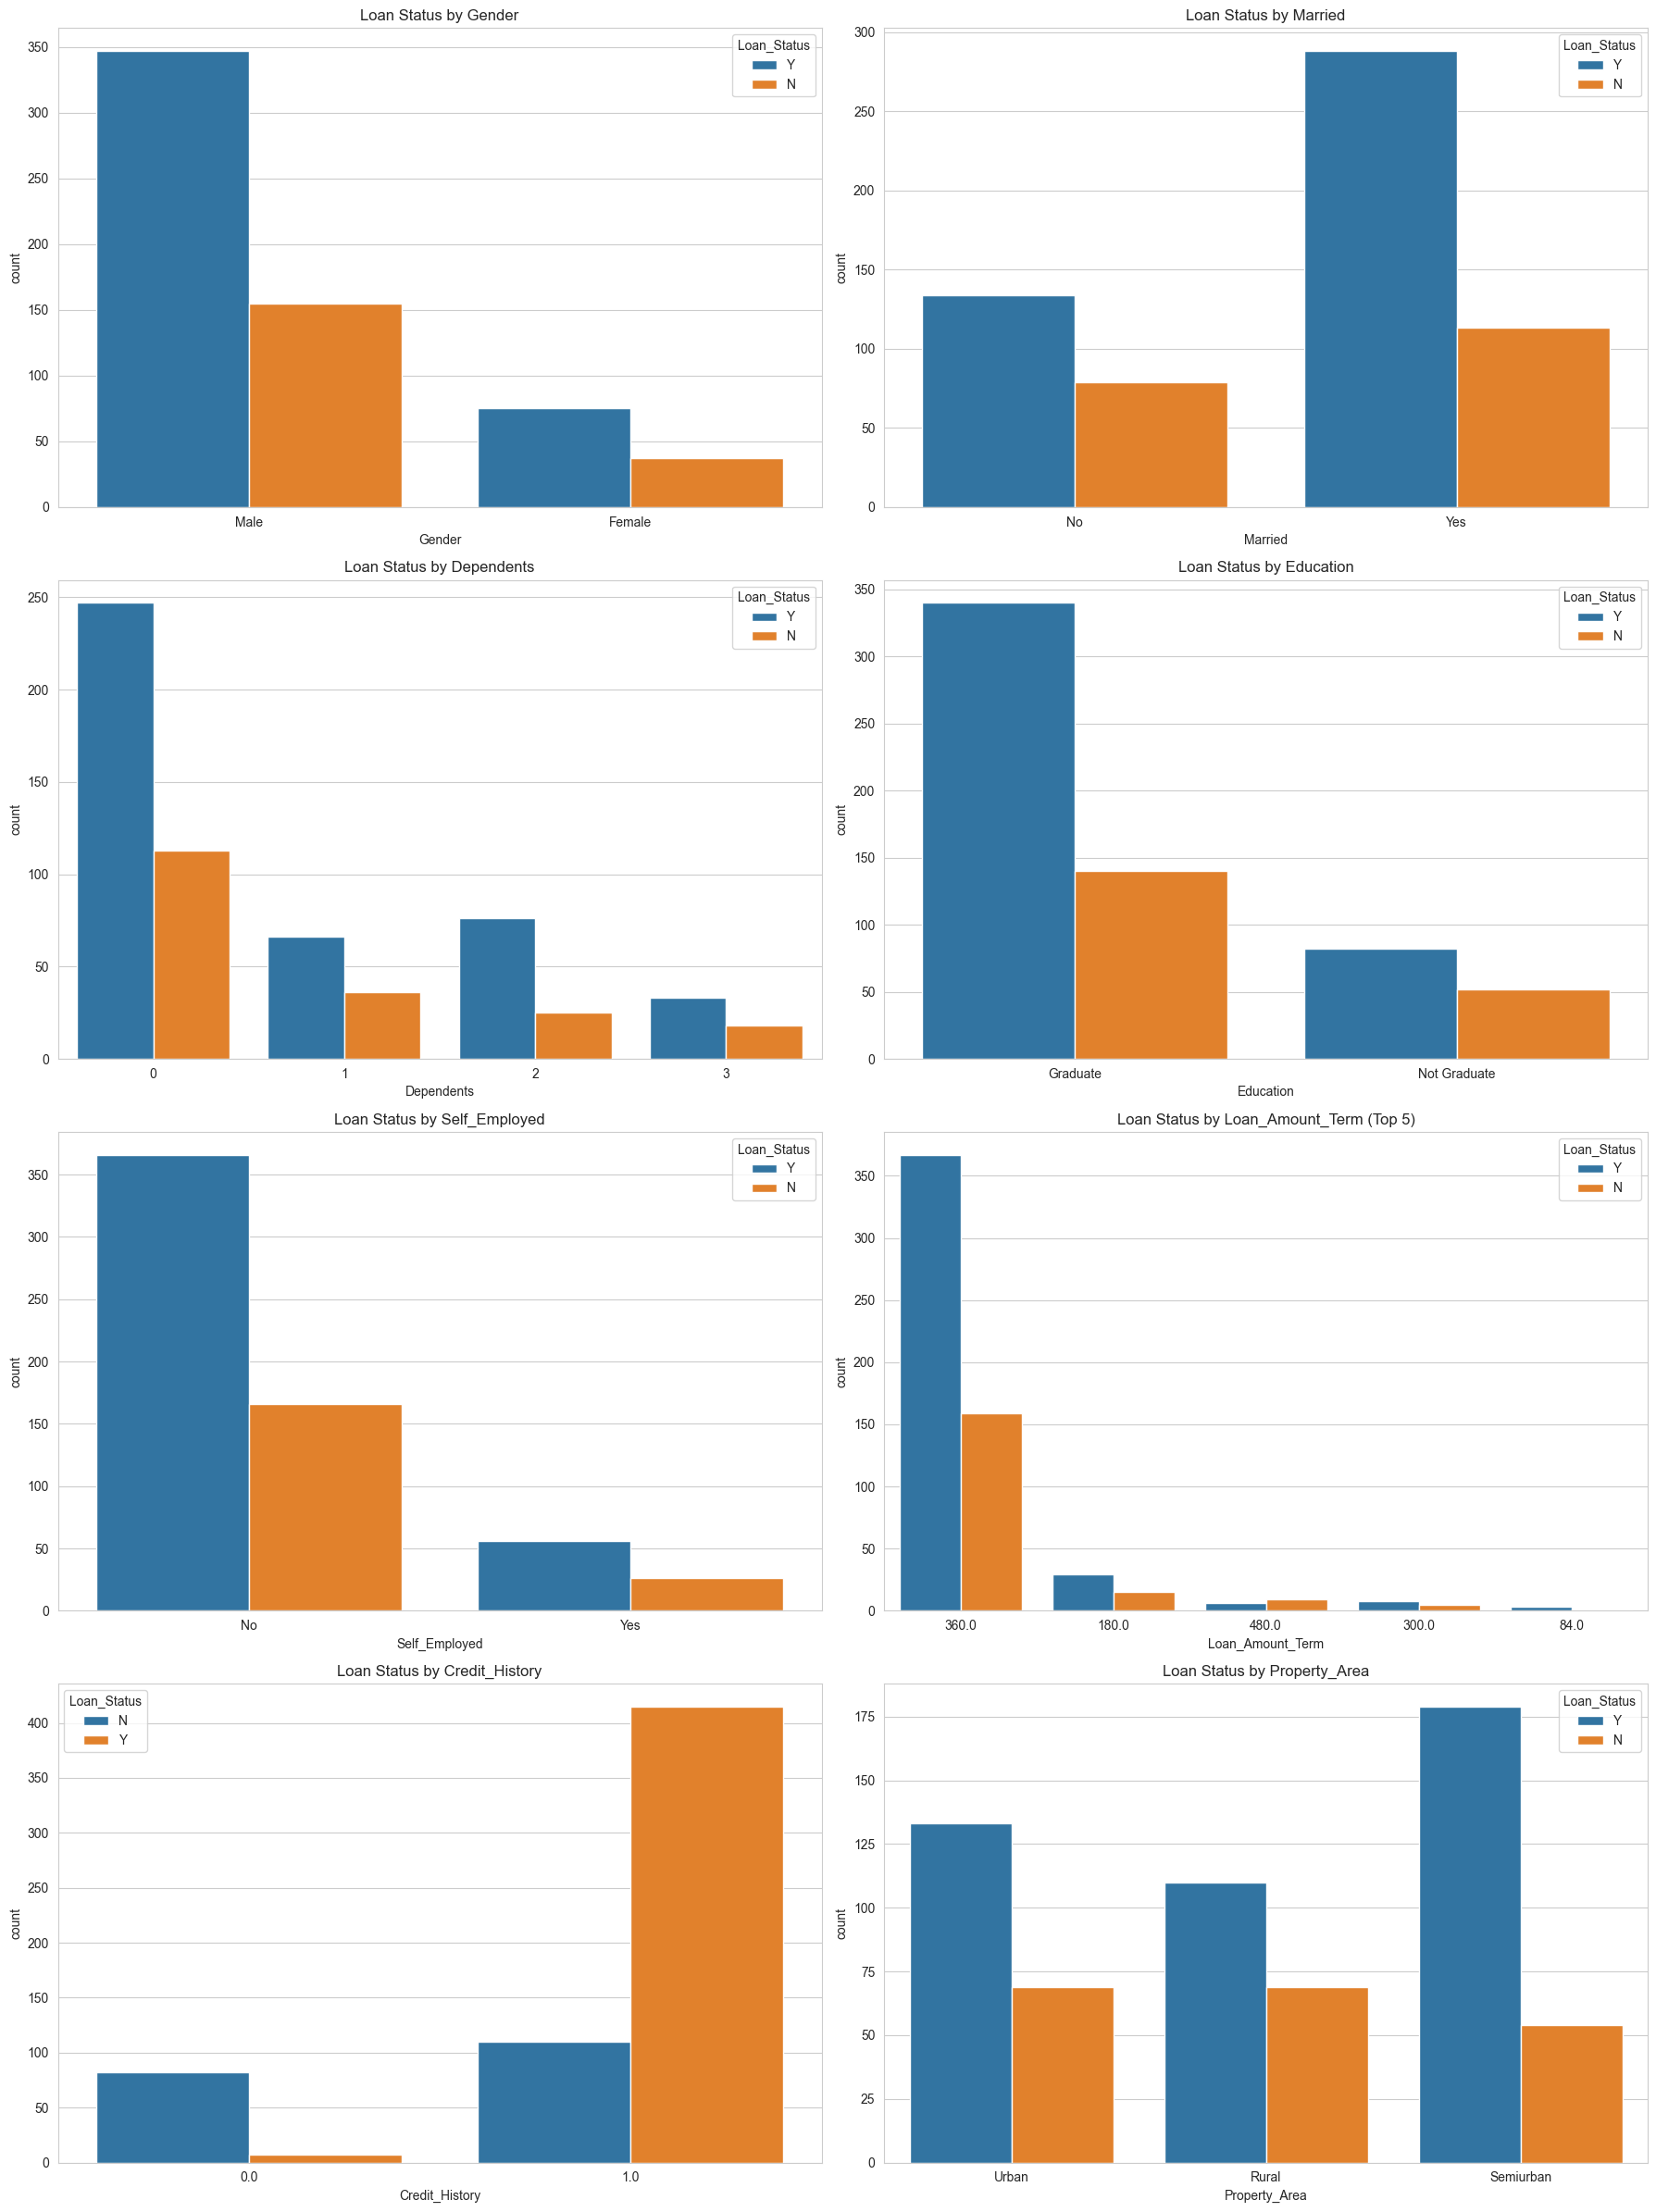

In [41]:
# We'll plot the same 8 features, but this time with 'Loan_Status' as the hue
fig, axes = plt.subplots(4, 2, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    if col == 'Loan_Amount_Term':
        # Again, just show top 5 terms for clarity
        sns.countplot(x=col, hue='Loan_Status', data=train_df, ax=axes[i], order=train_df[col].value_counts().index[:5])
        axes[i].set_title(f'Loan Status by {col} (Top 5)')
    else:
        sns.countplot(x=col, hue='Loan_Status', data=train_df, ax=axes[i])
        axes[i].set_title(f'Loan Status by {col}')

plt.tight_layout()
plt.show()

#### Insights (Task 2.5):
Credit_History is paramount: Applicants with a good history (1.0) are approved at a very high rate. Applicants with a bad history (0.0) are almost all rejected. This is the single most important predictor.

Property_Area matters: Semiurban has the highest approval rate, followed by Urban, and Rural has the lowest.

Married: Married applicants have a noticeably higher approval rate than non-married applicants.

Education: Graduates have a higher approval rate than Not Graduates.

Dependents: Approval rates seem to decrease slightly as the number of dependents increases, with '0' having the best rate.

Gender & Self_Employed: The approval rates look very similar between the groups (Male/Female, Yes/No), suggesting these are weaker predictors.

#### Numerical Features vs. Loan Status

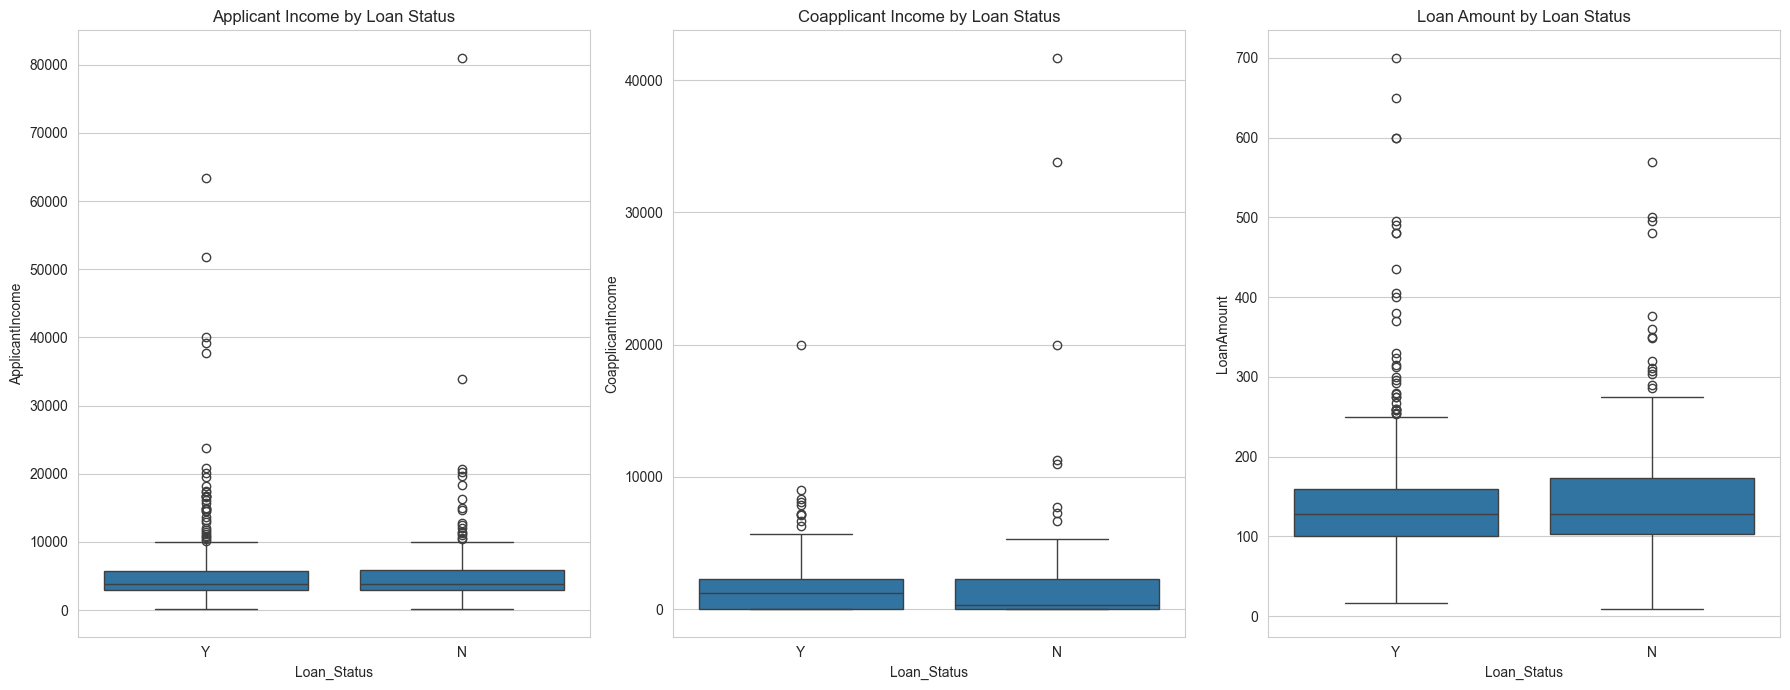

In [43]:
# Set up a figure for 3 plots
plt.figure(figsize=(18, 7))

# Plot 1: ApplicantIncome vs. Loan_Status
plt.subplot(1, 3, 1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df)
plt.title('Applicant Income by Loan Status')

# Plot 2: CoapplicantIncome vs. Loan_Status
plt.subplot(1, 3, 2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=train_df)
plt.title('Coapplicant Income by Loan Status')

# Plot 3: LoanAmount vs. Loan_Status
plt.subplot(1, 3, 3)
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('Loan Amount by Loan Status')

plt.tight_layout()
plt.show()

#### Insight (Task 2.5):

For all three continuous features, the median and interquartile range (the "box") are very similar for both 'Y' and 'N' groups.

This suggests that there is no simple, linear relationship (e.g., "higher income = approval"). The relationship is more complex. The outliers (high income, high loan amount) are present in both groups.

We can try creating a new feature, Total_Income (ApplicantIncome + CoapplicantIncome), to see if that helps.

#### Cross-Tabulations

In [45]:
# Use pandas.crosstab to see the count of approvals/rejections by credit history
credit_crosstab = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])

print("--- Cross-tabulation: Credit History vs. Loan Status ---")
print(credit_crosstab)

# We can also view this as percentages (e.g., what % of people with good credit were approved)
print("\n--- Row-wise Percentages ---")
print(credit_crosstab.apply(lambda r: r/r.sum(), axis=1) * 100)

--- Cross-tabulation: Credit History vs. Loan Status ---
Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415

--- Row-wise Percentages ---
Loan_Status             N          Y
Credit_History                      
0.0             92.134831   7.865169
1.0             20.952381  79.047619


#### Insight:
This plain text output is incredibly clear.<br>
 If an applicant has a bad credit history (0.0), they are rejected 92% of the time.
 If an applicant has a good credit history (1.0), they are approved 79% of the time. <br>
 This confirms our visual finding and shows this is the single most powerful predictor.

#### Scatter Plots

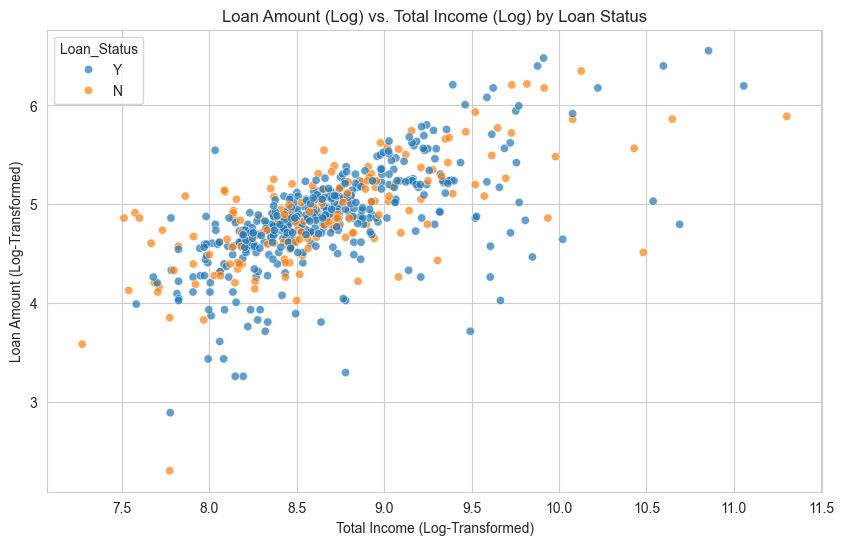

In [54]:
# Create a copy for this plot to avoid changing the original dataframe
plot_df = train_df.copy()

# Create new features for plotting
plot_df['Total_Income'] = plot_df['ApplicantIncome'] + plot_df['CoapplicantIncome']

# Apply log transform to fix skewness. Add 1 to avoid log(0)
plot_df['Total_Income_Log'] = np.log(plot_df['Total_Income'] + 1)
plot_df['LoanAmount_Log'] = np.log(plot_df['LoanAmount'] + 1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Income_Log', y='LoanAmount_Log', hue='Loan_Status', data=plot_df, alpha=0.7)
plt.title('Loan Amount (Log) vs. Total Income (Log) by Loan Status')
plt.xlabel('Total Income (Log-Transformed)')
plt.ylabel('Loan Amount (Log-Transformed)')
plt.show()

#### Insight:
 This plot is much clearer than a simple income plot.
 You can see that for any given income level, the approved ('Y', in orange) and rejected ('N', in blue) loans are mixed together.
 There is no simple "line" or "cluster" that separates approvals from rejections based on income and loan amount alone. This confirms that these features are weaker predictors than `Credit_History`.

#### Correlation

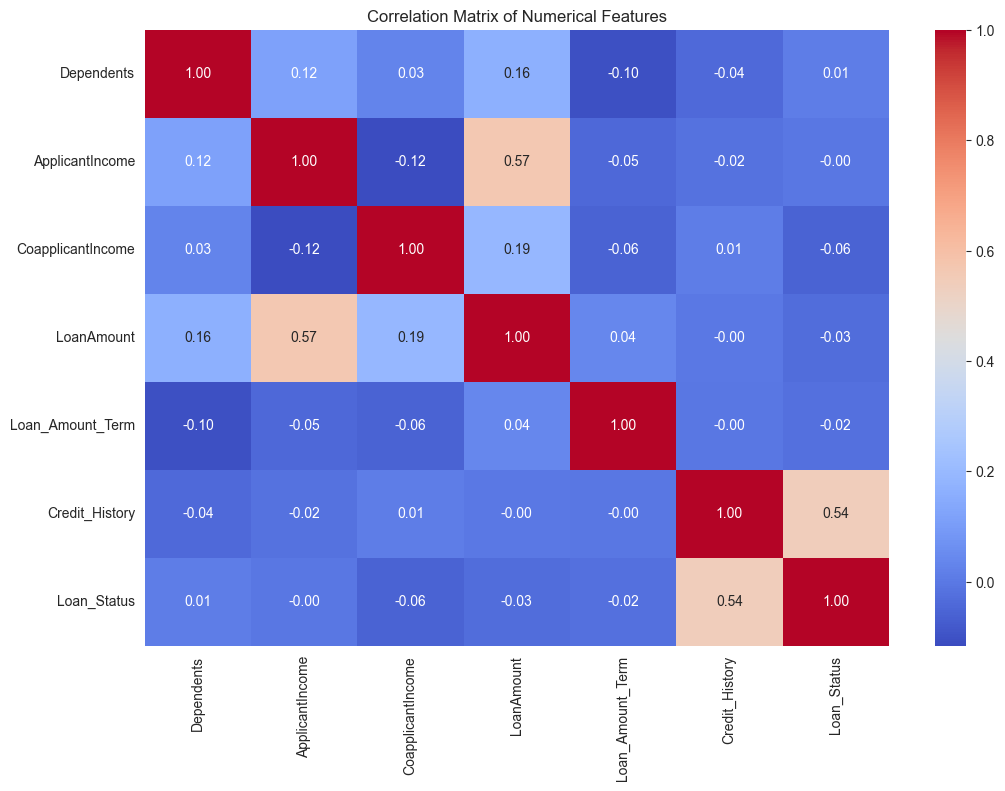

In [44]:
# Create a copy for correlation analysis
corr_df = train_df.copy()

# Convert Loan_Status to numeric (1 for Y, 0 for N)
corr_df['Loan_Status'] = corr_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Calculate the correlation matrix
corr_matrix = corr_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Insights (Task 2.4 & 2.5):

    Loan_Status and Credit_History: Confirms our visual finding with a strong positive correlation of 0.54.

    LoanAmount and ApplicantIncome: Have a strong positive correlation of 0.56. This is logical (people with higher incomes apply for larger loans).

    Loan_Status and other features: All other numerical features have a very weak linear correlation (near 0) with Loan_Status. This reinforces that their predictive power isn't a simple linear one, and that Credit_History is the dominant factor.

### **Task 2.5: Identify trends, anomalies, and patterns**

Here is a summary of all the key trends, patterns, and anomalies we've identified from our analysis (Tasks 2.1 - 2.4) that could impact loan outcomes, as specified in your project document.

#### **Key Predictive Patterns & Trends**

* **Credit History is the Most Dominant Factor:** This is the strongest pattern in the data. Our cross-tabulation showed that applicants with a good credit history (1.0) were approved **79%** of the time, while those with a bad history (0.0) were rejected **92%** of the time.
* **Property Area is a Strong Predictor:** Applicants from `Semiurban` areas have the highest approval rate, followed by `Urban`. `Rural` areas have the lowest approval rate.
* **Marital Status Shows a Clear Trend:** Married applicants have a noticeably higher approval rate than non-married applicants.
* **Education Level has a Minor Impact:** `Graduates` have a slightly higher (but not dramatic) approval rate than `Not Graduates`.
* **Weak Predictors:** Features like `Gender` and `Self_Employed` showed very little difference in approval rates, suggesting they are not strong predictors.

#### **Anomalies & Key Data Characteristics**

* **Income/Loan Amount is Not a Simple Predictor:** Our scatter plots and box plots showed **no clear, direct relationship** between `ApplicantIncome` (or `Total_Income`) and `Loan_Status`. The approval and rejection groups were heavily overlapped, meaning a high income, by itself, doesn't guarantee approval based on this data.
* **Extreme Skewness and Outliers:** The continuous numerical features (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`) are all **heavily right-skewed** and contain many outliers. This is a key characteristic we'd need to handle before modeling, likely with a log transformation.
* **Imbalanced Target Variable:** The dataset is **imbalanced**, with about 69% of loans being 'Approved' ('Y') and 31% 'Rejected' ('N'). This pattern is important for the modeling phase, as it could cause a model to be biased toward predicting 'Approved'.
---
This completes all the tasks in **Phase 2: Exploratory Data Analysis (EDA)**. We have a very clear picture of our data and the factors that influence loan approval.

# PHASE 3

# Final Report: Exploratory Data Analysis of the Home Loan Dataset

**Project:** Home Loan Dataset EDA
**Date:** [Date]
**Author:** [Your Name]

---

### **1. Project Overview and Objective**

The objective of this project was to conduct a comprehensive Exploratory Data Analysis (EDA) on the Home Loan dataset. The primary goal was to understand the underlying structure of the data, identify patterns, and find key relationships that influence loan approval status. This analysis is essential for uncovering insights that can support subsequent predictive modeling and strategic decision-making in home loan processing.

---

### **2. Methodology (The EDA Process)**

The analysis followed a structured, three-phase approach as outlined in the project plan.

#### **Phase 1: Data Collection and Preparation**
* **Loaded Data:** The `home_loan_train.csv` and `home_loan_test.csv` datasets were loaded into pandas DataFrames.
* **Inspected Data:** The training data was inspected, revealing missing values in `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term`, and `Credit_History`. It also revealed a non-numeric `Dependents` column (due to '3+').
* **Data Cleaning:**
    * **Categorical Imputation:** Missing values for all categorical columns (including `Credit_History`) were filled using the **mode** (most frequent value).
    * **Numerical Imputation:** Missing `LoanAmount` was filled with the **median** (to resist outlier skew) and `Loan_Amount_Term` was filled with the **mode**.
    * **Inconsistency Correction:** The `Dependents` column was cleaned by replacing '3+' with '3' and converting the column to a numeric data type.

#### **Phase 2: Exploratory Data Analysis**
* **Descriptive Analysis:** We analyzed the distributions of all numerical and categorical features.
    * **Numerical:** `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` were all found to be **heavily right-skewed** with significant outliers.
    * **Categorical:** `Credit_History` (1.0) was the dominant class (85%), as were `Male` (81%), `Married` (65%), and `Graduate` (78%). `Property_Area` was well-distributed, with `Semiurban` being the most common.
* **Relationship Analysis:** We examined the relationship between each feature and the target variable, `Loan_Status`, using three methods:
    1.  **Cross-tabulations:** Used for categorical features, most notably showing the powerful link between `Credit_History` and `Loan_Status`.
    2.  **Scatter Plots:** Used for numerical features (e.g., `Total_Income` vs. `LoanAmount`), which showed no clear linear separation between approved and rejected loans.
    3.  **Correlation Matrix:** This numerically confirmed the strong positive correlation (**0.54**) between `Credit_History` and `Loan_Status` and the weak correlation for all other numerical features.

---

### **3. Key Findings and Insights**

Our analysis uncovered several key insights that directly impact loan approval:

* **Finding 1: Credit History is the Most Dominant Predictor.**
    This is the most significant finding. Our cross-tabulation revealed that applicants with a good credit history (1.0) were **approved 79%** of the time. Conversely, applicants with a bad credit history (0.0) were **rejected 92%** of the time. This suggests a good credit history is a near-mandatory prerequisite for loan approval.

* **Finding 2: Property Area is a Strong Secondary Predictor.**
    The location of the property is a key factor. Applicants from `Semiurban` areas have the highest approval rate, followed by `Urban` areas. `Rural` areas have the lowest approval rate.

* **Finding 3: Marital Status Shows a Clear Trend.**
    Married applicants have a noticeably higher approval rate than non-married applicants.

* **Finding 4: Income/Loan Amount is Not a Simple Differentiator.**
    A key finding was the *lack* of a simple, direct relationship between income (or loan amount) and approval. Our scatter plots showed that approved and rejected loans exist at all income levels. This implies that while income is part of the equation, it is not a simple "high income = approval" rule and is likely evaluated *in combination* with other factors (like `Credit_History`).

---

### **4. Recommendations for Next Steps (Predictive Modeling)**

Based on the findings from this EDA, the following recommendations are made for any subsequent machine learning or modeling work:

1.  **Feature Engineering:**
    * **Handle Skewness:** The income and loan amount features are extremely skewed. A **log transform** should be applied to `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` to normalize their distributions, which will benefit most models.
    * **Create New Features:** Consider creating a `Total_Income` feature (`ApplicantIncome` + `CoapplicantIncome`) and a `Debt_to_Income_Ratio` feature (`LoanAmount` / `Total_Income`) as these may be more predictive.

2.  **Modeling Strategy:**
    * **Handle Imbalance:** The target variable `Loan_Status` is imbalanced (69% 'Y' vs. 31% 'N'). Techniques such as **SMOTE** (oversampling the 'N' class) or using a model with a `class_weight='balanced'` parameter will be necessary to prevent the model from just predicting 'Y'.
    * **Prioritize Features:** `Credit_History` and `Property_Area` should be considered high-importance features in any model.